In [5]:
import json
import pandas as pd
import numpy as np
import spotify
import spotipy
import time
import seaborn as sns
from spotipy.oauth2 import SpotifyClientCredentials

df1 = pd.read_json('StreamingHistory_music_0.json')
df2 = pd.read_json('StreamingHistory_podcast_0.json')
df = pd.concat([df1,df2], ignore_index=True)
client_id = 'afe88fb83c6144d8b3fce6547373bb96'
client_secret = '8efd0a8ad69349dc8aa3361e737a4f9e'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [52]:
top_artists = df['artistName'].value_counts().nlargest(100).index
filtered_df = df[df['artistName'].isin(top_artists)]

artistNames = set(filtered_df['artistName'])

artistGenreMap = {key: None for key in artistNames}

In [53]:
for artist in artistGenreMap:
   artistGenreMap[artist] = sp.search(q=artist, type='artist')
   time.sleep(0.3)

for artist in artistGenreMap:
   if artistGenreMap[artist]:
       print(artistGenreMap[artist]) #dict
       print(artistGenreMap[artist]['artists']) #dict
       print(type(artistGenreMap[artist]['artists']['items']))#list
       artistInfo = artistGenreMap[artist]['artists']['items'][0]
       print(artistInfo['genres'])
       break

{'artists': {'href': 'https://api.spotify.com/v1/search?query=Yoga+Lin&type=artist&offset=0&limit=10', 'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1GPoTgvXd5OqZMF1akOsV2'}, 'followers': {'href': None, 'total': 655933}, 'genres': ['chinese r&b', 'mandopop'], 'href': 'https://api.spotify.com/v1/artists/1GPoTgvXd5OqZMF1akOsV2', 'id': '1GPoTgvXd5OqZMF1akOsV2', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab6761610000e5ebb65d431ba3d7dbcb408bfd1b', 'width': 640}, {'height': 320, 'url': 'https://i.scdn.co/image/ab67616100005174b65d431ba3d7dbcb408bfd1b', 'width': 320}, {'height': 160, 'url': 'https://i.scdn.co/image/ab6761610000f178b65d431ba3d7dbcb408bfd1b', 'width': 160}], 'name': 'Yoga Lin', 'popularity': 55, 'type': 'artist', 'uri': 'spotify:artist:1GPoTgvXd5OqZMF1akOsV2'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/3AgxRYe2kXEfsZyB07hqJF'}, 'followers': {'href': None, 'total': 25406}, 'genres': ['mexican hip hop', 'trap mexican

In [54]:
updatedArtistToGenreMap = {}
for artist in artistGenreMap:
   try:
       updatedArtistToGenreMap[artist] =  artistGenreMap[artist]['artists']['items'][0]['genres']
   except:
       updatedArtistToGenreMap[artist] = None

In [83]:
import collections
genre_counts = collections.Counter([genre for genres in updatedArtistToGenreMap.values() if genres for genre in genres])



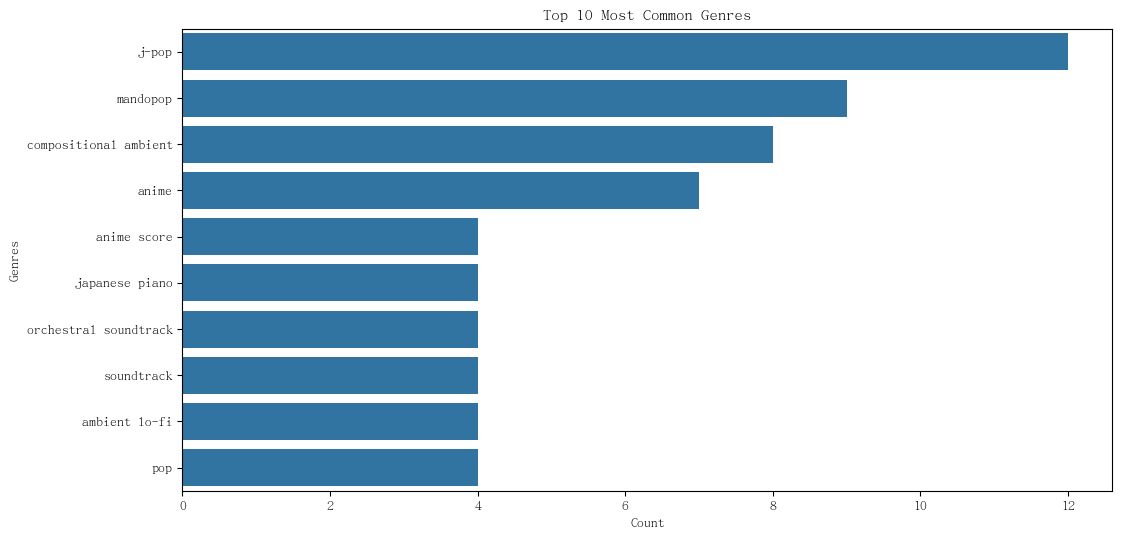

In [84]:
import matplotlib.pyplot as plt
genres, counts = zip(*genre_counts.most_common(10))  # Get top 10 genres
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(genres))
plt.title('Top 10 Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

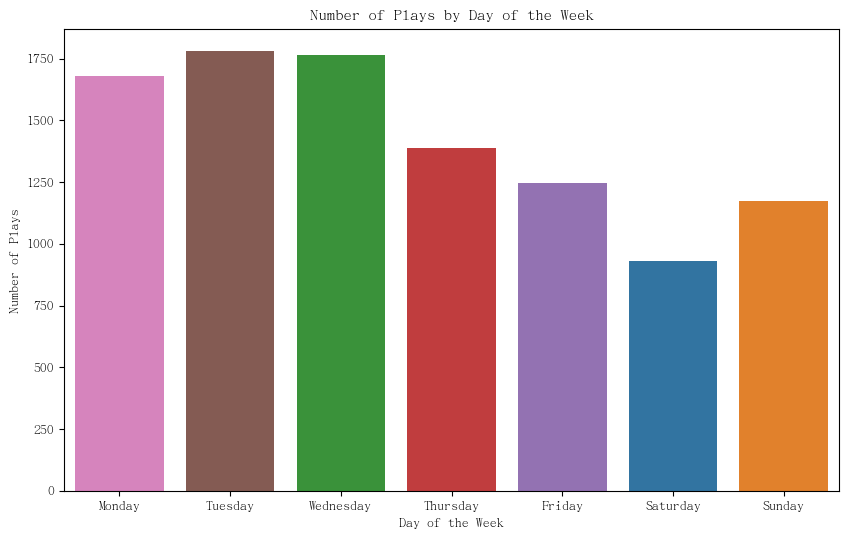

In [81]:
df['endTime'] = pd.to_datetime(df['endTime'])
df['day_of_week'] = df['endTime'].dt.day_name()
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], hue = 'day_of_week')
plt.title('Number of Plays by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Plays')
plt.show()

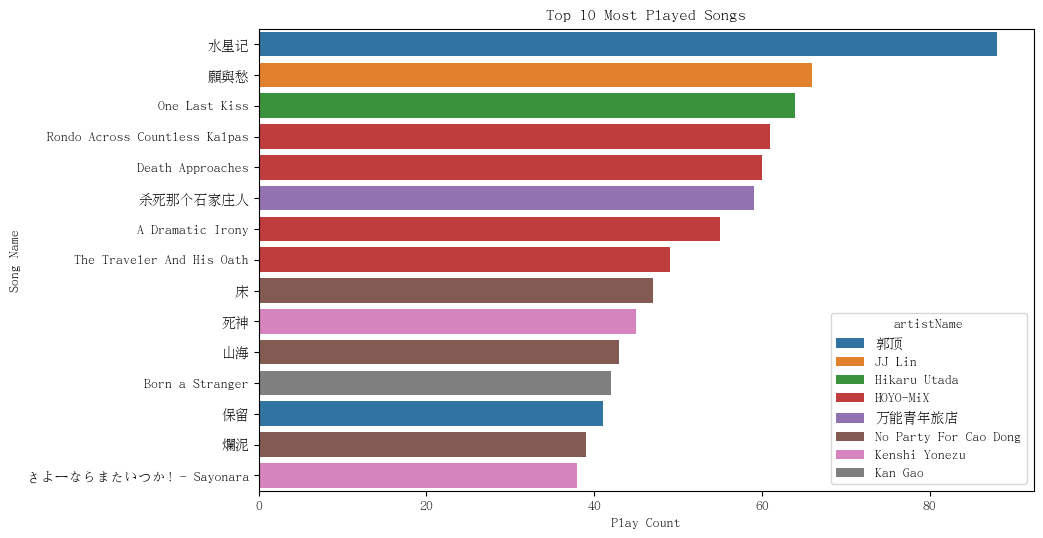

In [82]:
top_10_songs = df.groupby(['trackName', 'artistName']).size().nlargest(15).reset_index(name='play_count')
plt.rcParams['font.family'] = "AR PL UMing CN"
plt.figure(figsize=(10, 6))
sns.barplot(x='play_count', y='trackName', hue='artistName', data=top_10_songs, dodge=False)
plt.title('Top 10 Most Played Songs')
plt.xlabel('Play Count')
plt.ylabel('Song Name')

plt.show()